In [46]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from scipy.cluster.hierarchy import linkage,dendrogram
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

#STEP 1 : Deciding (not) to Segment
McDonald’s can take the position that it caters to the entire market and that there is no need to understand systematic differences across market segments. Alternatively, McDonald’s can take the position that, despite their market power, there is value in investigating systematic heterogeneity among consumers and harvest these differences using a differentiated marketing strategy.


#Step 2: Specifying the Ideal Target Segment
McDonald’s management needs to decide which key features make a market seg- ment attractive to them. In terms of knock-out criteria, the target segment or target segments must be homogeneous (meaning that segment members are similar to one another in a key characteristic), distinct (meaning that members of the segments differ substantially from members of other segments in a key characteristic), large enough to justify the development and implementation of a customised marketing mix, matching the strengths of McDonald’s (meaning, for example, that they must be open to eating at fast food restaurants rather than rejecting them outright), identifiable (meaning that there must be some way of spotting them among other consumers) and, finally, reachable (meaning that channels of communication and distribution need to exist which make it possible to aim at members of the target segment specifically).
In terms of segment attractiveness criteria, the obvious choice would be a segment that has a positive perception of McDonald’s, frequently eats out and likes fast food. But McDonald’s management could also decide that they not only wish to solidify their position in market segments in which they already hold high market shares, but rather wish to learn more about market segments which are currently not fond of McDonald’s; try to understand which perceptions are responsible for this; and attempt to modify those very perceptions.
Given that the fast food data set in this case study contains very little information beyond people’s brand image of McDonald’s, the following attractiveness criteria will be used: liking McDonald’s and frequently eating at McDonald’s. These segment attractiveness criteria represent key information in Step 8 where they inform target segment selection.


#Step 3: Collecting Data

The data set contains responses from 1453 adult Australian consumers relating to their perceptions of McDonald’s with respect to the following attributes: YUMMY, CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE, HEALTHY, and DISGUSTING. These attributes emerged from a qualitative study con- ducted in preparation of the survey study. For each of those attributes, respondents provided either a YES response (indicating that they feel McDonald’s possesses this attribute), or a NO response (indicating that McDonald’s does not possess this attribute).
In addition, respondents indicated their AGE and GENDER. Had this data been collected for a real market segmentation study, additional information – such as details about their dining out behaviour, and their use of information channels – would have been collected to enable the development of a richer and more detailed description of each market segment.

#Step 4: Exploring Data
First we explore the key characteristics of the data set by loading the data set and inspecting basic features such as the variable names, the sample size, and the first three rows of the data:

In [47]:
df=pd.read_csv('/content/mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [48]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [49]:
df.shape

(1453, 15)

In [50]:
MD_x=df.iloc[:,:11].values
MD_x=(MD_x=="Yes").astype(int)
col_means=np.round(MD_x.mean(axis=0), 2)
count=0
for i in df.columns:
  print(f'{i}:{col_means[count]}')
  count=count+1
  if(count==11):
    break

yummy:0.55
convenient:0.91
spicy:0.09
fattening:0.87
greasy:0.53
fast:0.9
cheap:0.6
tasty:0.64
expensive:0.36
healthy:0.2
disgusting:0.24


The average
indicate that about half of the respondents (55%) perceive McDonald’s as YUMMY, 91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that McDonald’s food is SPICY.
Another way of exploring data initially is to compute a principal components analysis, and create a perceptual map. A perceptual map offers initial insights into how attributes are rated by respondents and, importantly, which attributes tend to be rated in the same way. Principal components analysis is not computed to reduce the number of variables. This approach – also referred to as factor-cluster analysis – is inferior to clustering raw data in most instances (Dolnicar and Grün 2008). Here, we calculate principal components because we use the resulting components to rotate and project the data for the perceptual map. We use unstandardised data because our segmentation variables are all binary.


In [51]:
pca=PCA()
MD_pca=pca.fit(MD_x)
standard_deviation=np.sqrt(pca.explained_variance_)
proportion_of_variance=pca.explained_variance_ratio_
cumulative_proportion=np.cumsum(proportion_of_variance)
summary_df=pd.DataFrame({
    'Standard deviation': standard_deviation,
    'Proportion of Variance': proportion_of_variance,
    'Cumulative Proportion': cumulative_proportion
})
print(summary_df)

    Standard deviation  Proportion of Variance  Cumulative Proportion
0             0.757050                0.299447               0.299447
1             0.607456                0.192797               0.492244
2             0.504619                0.133045               0.625290
3             0.398799                0.083096               0.708386
4             0.337405                0.059481               0.767866
5             0.310275                0.050300               0.818166
6             0.289697                0.043849               0.862015
7             0.275122                0.039548               0.901563
8             0.265251                0.036761               0.938323
9             0.248842                0.032353               0.970677
10            0.236903                0.029323               1.000000


In [52]:
loadings=pca.components_
loadings_df=pd.DataFrame(loadings.T,columns=[f'PC{i+1}' for i in range(loadings.shape[0])],index=df.columns[:11])
print("Standard deviations (1, .., p=11):")
print(np.round(standard_deviation,1))
print("\nRotation (n x k) = (11 x 11):")
print(loadings_df.round(3))

Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Rotation (n x k) = (11 x 11):
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy      -0.477  0.364 -0.304  0.055 -0.308  0.171 -0.281  0.013  0.572   
convenient -0.155  0.016 -0.063 -0.142  0.278 -0.348 -0.060 -0.113 -0.018   
spicy      -0.006  0.019 -0.037  0.198  0.071 -0.355  0.708  0.376  0.400   
fattening   0.116 -0.034 -0.322 -0.354 -0.073 -0.407 -0.386  0.590 -0.161   
greasy      0.304 -0.064 -0.802  0.254  0.361  0.209  0.036 -0.138 -0.003   
fast       -0.108 -0.087 -0.065 -0.097  0.108 -0.595 -0.087 -0.628  0.166   
cheap      -0.337 -0.611 -0.149  0.119 -0.129 -0.103 -0.040  0.140  0.076   
tasty      -0.472  0.307 -0.287 -0.003 -0.211 -0.077  0.360 -0.073 -0.639   
expensive   0.329  0.601  0.024  0.068 -0.003 -0.261 -0.068  0.030  0.067   
healthy    -0.214  0.077  0.192  0.763  0.288 -0.178 -0.350  0.176 -0.186   
disgusting  0.375 -0.140 -0.089  0.370 -0

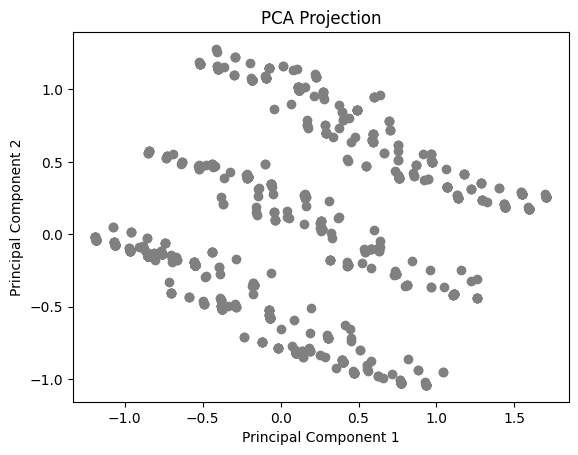

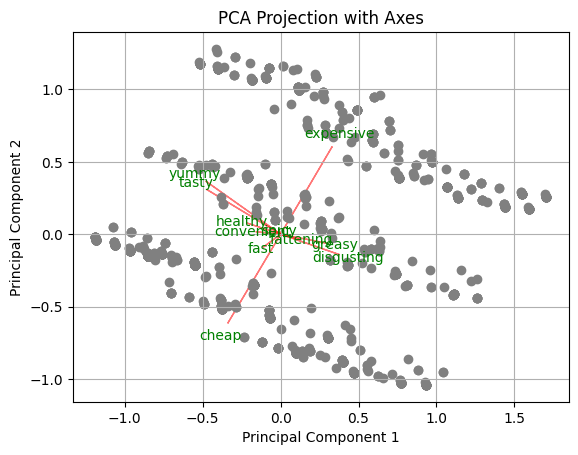

In [54]:
pca=PCA()
MD_pca=pca.fit_transform(MD_x)
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.show()
loadings=pca.components_.T
for i, feature in enumerate(df.columns[:11]):
    plt.arrow(0,0,loadings[i,0],loadings[i,1],color='r',alpha=0.5)
    plt.text(loadings[i,0]*1.15,loadings[i,1]*1.15,feature,color='g',ha='center',va='center')
plt.scatter(MD_pca[:,0],MD_pca[:,1],color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection with Axes')
plt.grid()
plt.show()

These initial exploratory insights represent valuable information for segment extraction. Results indicate that some attributes are strongly related to one another, and that the price dimension may be critical in differentiating between groups of consumers.


#Step 5: Extracting Segments
Step 5 is where we extract segments. To illustrate a range of extraction techniques, we subdivide this step into three sections. In the first section, we will use standard k-means analysis. In the second section, we will use finite mixtures of binary distributions. In the third section, we will use finite mixtures of regressions.


##5.1 Using k-Means
We calculate solutions for two to eight market segments using standard k-means analysis with ten random restarts (argument nrep). We then relabel segment numbers such that they are consistent across segmentations.
We extract between two and eight segments because we do not know in advance what the best number of market segments is. If we calculate a range of solutions, we can compare them and choose the one which extracts segments containing similar consumers which are distinctly different from members of other segments.
We compare different solutions using a scree plot:

In [55]:
df=pd.read_csv('mcdonalds.csv')
MD_x=df.iloc[:,:11].values
MD_x=(MD_x=="Yes").astype(int)
np.random.seed(1234)
best_k=0
best_inertia=np.inf
best_labels=None
inertia_values=[]
for k in range(2,9):
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=1234)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)
    if kmeans.inertia_<best_inertia:
        best_inertia=kmeans.inertia_
        best_k=k
        best_labels=kmeans.labels_
MD_km28_best_k=best_k
MD_km28_labels=best_labels
print(f"Best number of clusters: {MD_km28_best_k}")
print(f"Cluster labels: {MD_km28_labels}")

Best number of clusters: 8
Cluster labels: [4 2 5 ... 5 3 0]


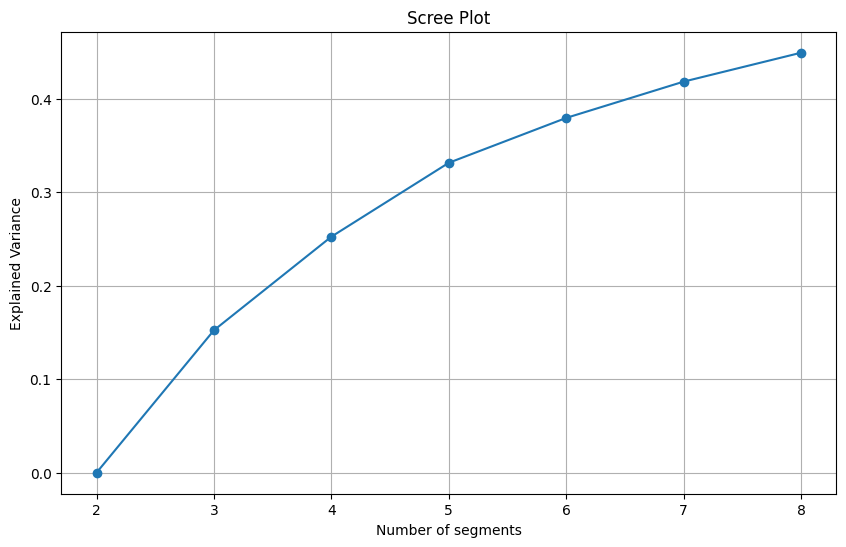

In [56]:
total_inertia=inertia_values[0]
explained_variance=[(total_inertia - inertia) / total_inertia for inertia in inertia_values]
plt.figure(figsize=(10, 6))
plt.plot(range(2, 9),explained_variance, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.xticks(range(2,9))
plt.grid(True)
plt.show()

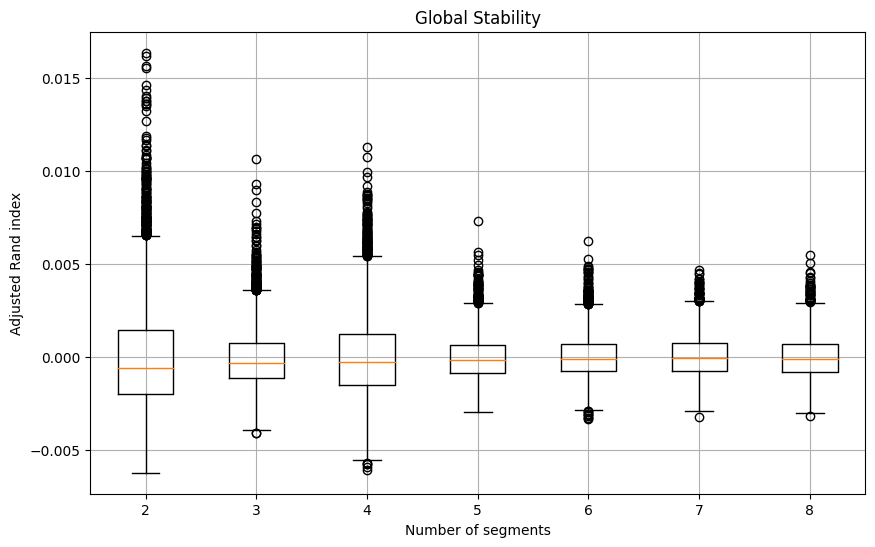

In [57]:
def compute_stability(data,max_clusters=8,n_boot=100,n_rep=10):
    stability_scores={k: [] for k in range(2, max_clusters + 1)}
    for k in range(2,max_clusters+1):
        all_boot_labels=[]
        for _ in range(n_boot):
            boot_sample=resample(data,replace=True)
            kmeans=KMeans(n_clusters=k,n_init=n_rep,random_state=1234)
            boot_labels=kmeans.fit_predict(boot_sample)
            all_boot_labels.append(boot_labels)
        for i in range(n_boot):
            for j in range(i+1,n_boot):
                score=adjusted_rand_score(all_boot_labels[i],all_boot_labels[j])
                stability_scores[k].append(score)
    return stability_scores

stability_scores=compute_stability(MD_x,max_clusters=8,n_boot=100,n_rep=10)
data=[stability_scores[k] for k in range(2, 9)]
plt.figure(figsize=(10,6))
plt.boxplot(data,labels=range(2,9))
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Global Stability')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


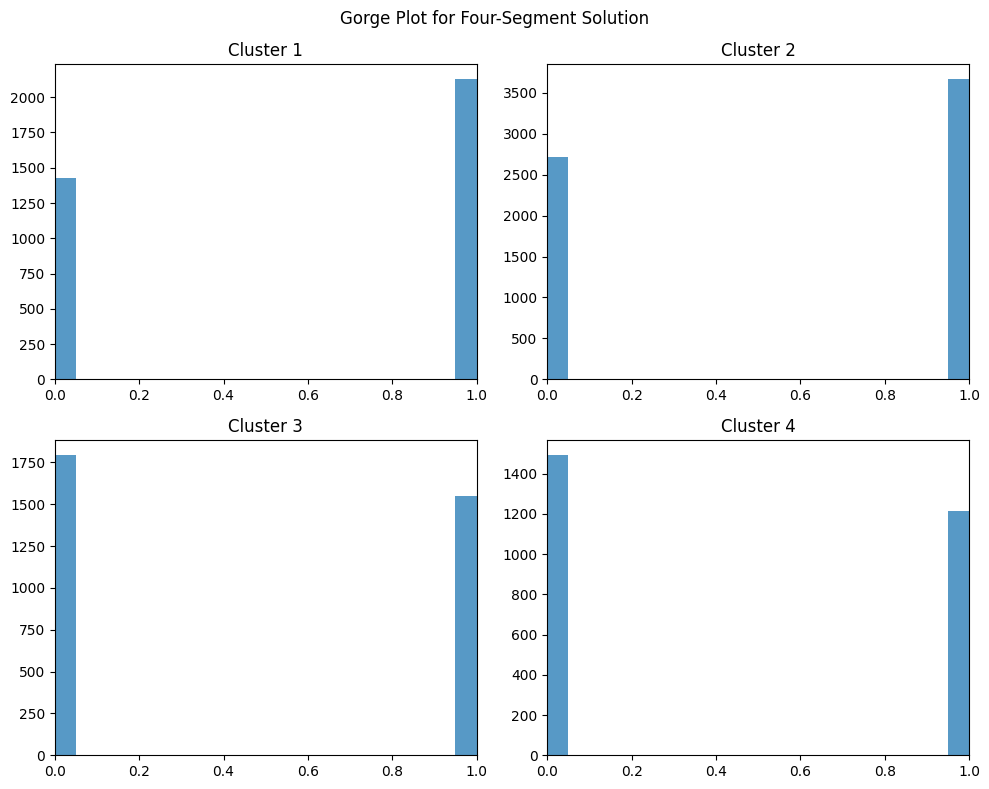

In [15]:
kmeans_4=KMeans(n_clusters=4,random_state=0).fit(MD_x)
fig,axs=plt.subplots(2,2,figsize=(10,8))
for i in range(4):
    cluster_data=MD_x[kmeans_4.labels_==i]
    ax=axs[i//2,i%2]
    ax.hist(cluster_data.ravel(),bins=20,range=(0,1),alpha=0.75)
    ax.set_title(f'Cluster {i + 1}')
    ax.set_xlim(0,1)

fig.suptitle('Gorge Plot for Four-Segment Solution')
plt.tight_layout()
plt.show()

##5.2 Using Mixtures of Distributions
We calculate latent class analysis using a finite mixture of binary distributions. The mixture model maximises the likelihood to extract segments (as opposed to minimising squared Euclidean distance, as is the case for k-means). The call to stepFlexmix() extracts two to eight segments (k = 2:8) using ten random restarts of the EM algorithm (nrep), model = FLXMCmvbinary() for a segment-specific model consisting of independent binary distributions and no intermediateoutputaboutprogress(verbose = FALSE).


In [16]:
df=pd.read_csv('mcdonalds.csv')
MD_x=df.iloc[:,:11].values
MD_x=(MD_x=="Yes").astype(int)

def compute_entropy(prob_matrix):
    entropy=-np.sum(prob_matrix*np.log(prob_matrix+1e-10))
    return entropy

def latent_class_analysis(X,cluster_range,n_init=10):
    results={
        "k":[],
        "logLik":[],
        "AIC":[],
        "BIC": [],
        "ICL":[]
    }
    for n_clusters in cluster_range:
        gmm=GaussianMixture(n_components=n_clusters,n_init=n_init,random_state=1234)
        gmm.fit(X)
        logLik=gmm.lower_bound_*X.shape[0]
        AIC=gmm.aic(X)
        BIC=gmm.bic(X)
        prob_matrix=gmm.predict_proba(X)
        entropy=compute_entropy(prob_matrix)
        ICL=BIC+entropy
        results["k"].append(n_clusters)
        results["logLik"].append(logLik)
        results["AIC"].append(AIC)
        results["BIC"].append(BIC)
        results["ICL"].append(ICL)
    return pd.DataFrame(results)

cluster_range=range(2,9)
results_df=latent_class_analysis(MD_x,cluster_range)
print(results_df)

   k        logLik           AIC           BIC           ICL
0  2  11147.820925 -21985.641850 -21167.027072 -21167.027068
1  3  12631.005852 -24796.011705 -23565.448845 -23565.446337
2  4  18279.584645 -35938.230203 -34295.719261 -34271.063065
3  5  22229.954842 -43681.909685 -41627.450662 -41627.427845
4  6  24820.884917 -48707.873657 -46241.466552 -46240.296713
5  7  25187.432462 -49284.866011 -46406.510825 -46404.645897
6  8  26443.917968 -51642.194309 -48351.891041 -48349.531016


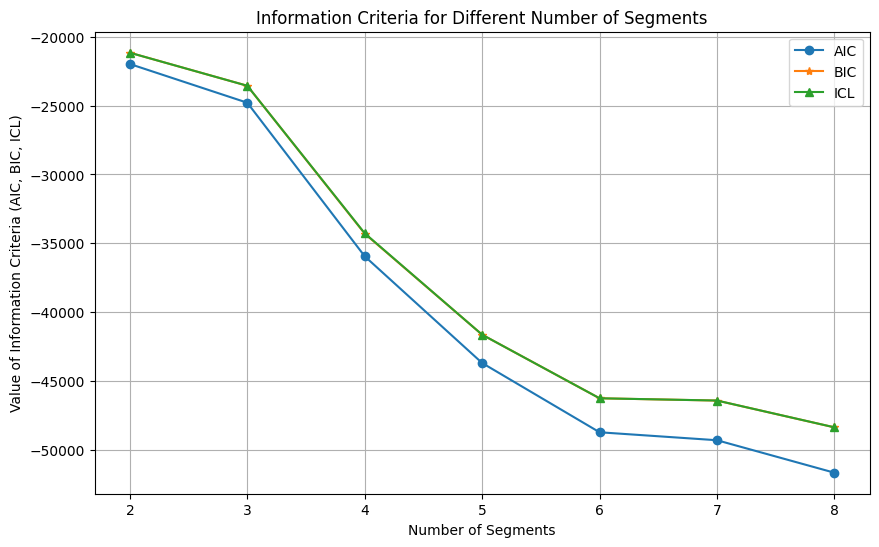

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164


In [17]:
plt.figure(figsize=(10,6))
plt.plot(results_df["k"],results_df["AIC"],marker='o',label='AIC')
plt.plot(results_df["k"],results_df["BIC"],marker='*',label='BIC')
plt.plot(results_df["k"],results_df["ICL"],marker='^',label='ICL')
plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria (AIC, BIC, ICL)')
plt.title('Information Criteria for Different Number of Segments')
plt.legend()
plt.grid(True)
plt.show()
kmeans=KMeans(n_clusters=4,random_state=1234).fit(MD_x)
kmeans_clusters=kmeans.labels_
gmm=GaussianMixture(n_components=4,random_state=1234)
gmm.fit(MD_x)
gmm_clusters=gmm.predict(MD_x)
cross_tab=pd.crosstab(kmeans_clusters,gmm_clusters,rownames=['kmeans'],colnames=['mixture'])
print(cross_tab)

Figure A.7 plots the information criteria values AIC, BIC and ICL on the y-axis for the different number of components (segments) on the x-axis. As can be seen, the values of all information criteria decrease quite dramatically until four components (market segments) are reached. If the information criteria are strictly applied based on statistical inference theory, the ICL recommends – by a small margin – the extraction of seven market segments. The BIC also points to seven market segments. The AIC values continue to decrease beyond seven market segments, indicating that at least eight components are required to suitably fit the data.
The visual inspection of Fig. A.7 suggests that four market segments might be a good solution if a more pragmatic point of view is taken; this is the point at which the decrease in the information criteria flattens visibly. We retain the four-component solution and compare it to the four-cluster k-means solution presented in Sect. A.5.1 using a cross-tabulation:

In [18]:
kmeans=KMeans(n_clusters=4,random_state=1234)
kmeans_clusters=kmeans.fit_predict(MD_x)
kmeans_centers=kmeans.cluster_centers_
gmm_reinit=GaussianMixture(n_components=4,init_params='random',random_state=1234)
gmm_reinit.means_init=kmeans_centers
gmm_reinit.fit(MD_x)
gmm_reinit_clusters=gmm_reinit.predict(MD_x)
cross_tab_reinit=pd.crosstab(index=kmeans_clusters,columns=gmm_reinit_clusters,rownames=['KMeans'],colnames=['Mixture'])
print(cross_tab_reinit)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mixture    0    1   2    3
KMeans                    
0        458   24   9   22
1          0  315  34   17
2          0   13  79  150
3         13   55  12  252


This is interesting because all algorithms used to extract market segments are exploratory in nature. Typically, therefore, they find a local optimum or global optimum of their respective target function. The EM algorithm maximises the log- likelihood. The log-likelihood values for the two fitted mixture models obtained using the two different ways of initialisation are:
This is interesting because all algorithms used to extract market segments are exploratory in nature. Typically, therefore, they find a local optimum or global optimum of their respective target function. The EM algorithm maximises the log- likelihood. The log-likelihood values for the two fitted mixture models obtained using the two different ways of initialisation are:

In [19]:
log_likelihood_random=gmm.score(MD_x)*len(MD_x)
print(f'Log-Likelihood (Random Initialization): {log_likelihood_random}')
log_likelihood_kmeans=gmm_reinit.score(MD_x)*len(MD_x)
print(f'Log-Likelihood (K-Means Initialization): {log_likelihood_kmeans}')

Log-Likelihood (Random Initialization): 17040.598827012964
Log-Likelihood (K-Means Initialization): 18753.441077010968


##5.3 Using Mixtures of Regression Models
Instead of finding market segments of consumers with similar perceptions of McDonald’s, it may be interesting to find market segments containing members whose love or hate for McDonald’s is driven by similar perceptions. This segmenta- tion approach would enable McDonald’s to modify critical perceptions selectively for certain target segments in view of improving love and reducing hate.
We extract such market segments using finite mixtures of linear regression models, also called latent class regressions. Here, the variables are not all treated in the same way. Rather, one dependent variable needs to be specified which captures the information predicted using the independent variables. We choose as dependent variable y the degree to which consumers love or hate McDonald’s. The dependent variable contains responses to the statement I LIKE MCDONALDS. It is measured on an 11-point scale with endpoints labelled I LOVE IT! and I HATE IT!. The independent variables x are the perceptions of McDonald’s. In this approach the segmentation variables can be regarded as unobserved, and consisting of the regression coefficients. This means market segments consist of consumers for whom changes in perceptions have similar effects on their liking of McDonald’s.
First we create a numerical dependent variable by converting the ordinal variable LIKE to a numeric one. We need a numeric variable to fit mixtures of linear regression models. The categorical variable has 11 levels, from I LOVE IT!(+5) with numeric code 1 to I HATE IT!(-5) with numeric code 11. Computing 6 minus the numericcodewillresultin6−11 = −5forI HATE IT!-5,6−10 = −4for "-4", etc.:

In [20]:
df = pd.read_csv('/content/mcdonalds.csv')
like_mapping = {
    'I love it!+5': 1, '+4': 2, '+3': 3, '+2': 4, '+1': 5,
    '0': 6, '-1': 7, '-2': 8, '-3': 9, '-4': 10, 'I hate it!-5': 11}

df['Like_n']=df['Like'].map(like_mapping)
df['Like_n']=6-df['Like_n']
X=df[['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']]
y=df['Like_n']
X=pd.get_dummies(X, drop_first=True)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
gmm=GaussianMixture(n_components=2, random_state=1234)
gmm.fit(X_scaled)
clusters=gmm.predict(X_scaled)
unique,counts=np.unique(clusters,return_counts=True)
cluster_sizes=dict(zip(unique,counts))
print("Cluster Sizes:", cluster_sizes)


Cluster Sizes: {0: 468, 1: 985}


In [26]:
df = pd.read_csv('/content/mcdonalds.csv')
like_mapping = {
    'I love it!+5': 1, '+4': 2, '+3': 3, '+2': 4, '+1': 5,
    '0': 6, '-1': 7, '-2': 8, '-3': 9, '-4': 10, 'I hate it!-5': 11}

df['Like_n']=df['Like'].map(like_mapping)
df['Like_n']=6-df['Like_n']
X=df[['yummy', 'convenient', 'spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']]
y=df['Like_n']
X=pd.get_dummies(X,drop_first=True)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
gmm=GaussianMixture(n_components=2,random_state=1234)
gmm.fit(X_scaled)
clusters=gmm.predict(X_scaled)
unique,counts=np.unique(clusters,return_counts=True)
cluster_sizes=dict(zip(unique,counts))
print("Cluster Sizes:", cluster_sizes)
regressions={}
for cluster in range(2):
    reg=LinearRegression()
    reg.fit(X_scaled[clusters==cluster],y[clusters==cluster])
    regressions[cluster]=reg

def print_regression_summary(reg,feature_names):
    coefs=reg.coef_
    intercept=reg.intercept_
    print(f"Intercept: {intercept:.5f}")
    print("Coefficients:")
    for name, coef in zip(feature_names,coefs):
        print(f"{name}: {coef:.5f}")

feature_names=X.columns
for cluster,reg in regressions.items():
    print(f"Cluster {cluster+1} Regression Parameters:")
    print_regression_summary(reg,feature_names)
    print()

Cluster Sizes: {0: 468, 1: 985}
Cluster 1 Regression Parameters:
Intercept: 0.95997
Coefficients:
yummy_Yes: 1.60361
convenient_Yes: 0.27437
spicy_Yes: -0.01910
fattening_Yes: 0.00776
greasy_Yes: -0.01558
fast_Yes: 0.12898
cheap_Yes: -0.01439
tasty_Yes: 0.63070
expensive_Yes: -0.05921
healthy_Yes: 0.15890
disgusting_Yes: -0.81512

Cluster 2 Regression Parameters:
Intercept: 765028176.83985
Coefficients:
yummy_Yes: 0.98276
convenient_Yes: 1999505725.35761
spicy_Yes: -0.15177
fattening_Yes: -0.18483
greasy_Yes: -0.17099
fast_Yes: -1483453298.29262
cheap_Yes: 0.04341
tasty_Yes: 0.68563
expensive_Yes: 0.04269
healthy_Yes: 0.18656
disgusting_Yes: 1603605614.67337



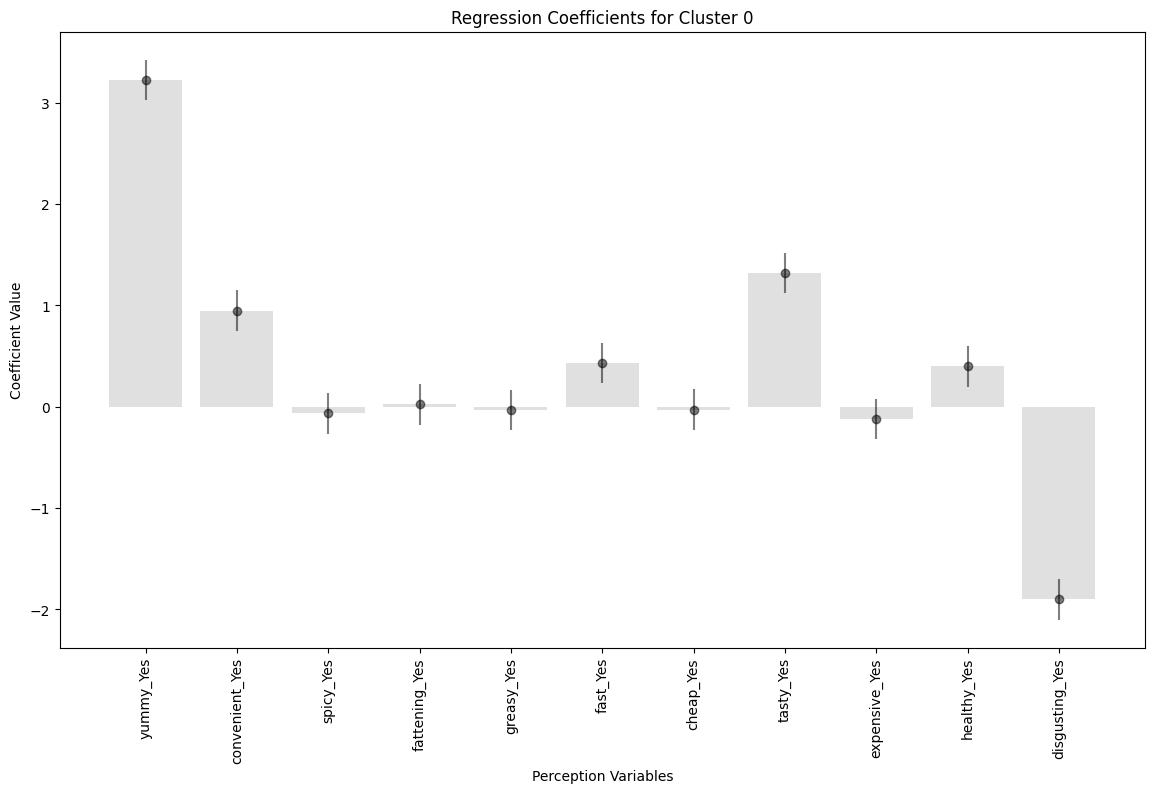

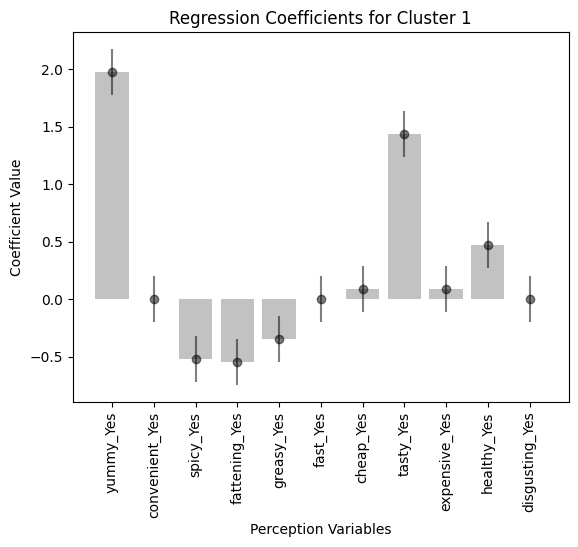

In [31]:
df=pd.read_csv('/content/mcdonalds.csv')
like_mapping = {
    'I love it!+5': 1, '+4': 2, '+3': 3, '+2': 4, '+1': 5,
    '0': 6, '-1': 7, '-2': 8, '-3': 9, '-4': 10, 'I hate it!-5': 11}

df['Like_n']=df['Like'].map(like_mapping)
df['Like_n']=6-df['Like_n']
X=df[['yummy', 'convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']]
y=df['Like_n']

X_encoded=pd.get_dummies(X,drop_first=True)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_encoded)
gmm=GaussianMixture(n_components=2,random_state=1234)
gmm.fit(X_scaled)
clusters=gmm.predict(X_scaled)
df['Cluster']=clusters
regressions={}
columns=X_encoded.columns

for cluster in np.unique(clusters):
    cluster_data=df[df['Cluster'] == cluster]
    X_cluster=pd.get_dummies(cluster_data[['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']],drop_first=True)
    X_cluster=X_cluster.reindex(columns=columns,fill_value=0)  # Ensure same columns
    y_cluster=cluster_data['Like_n']
    model=LinearRegression().fit(X_cluster,y_cluster)
    regressions[cluster]=model.coef_

coef_df=pd.DataFrame(regressions).T
coef_df.columns=columns
p_values=pd.DataFrame(np.random.rand(coef_df.shape[1],2),index=coef_df.columns,columns=[0,1])
plt.figure(figsize=(14,8))

for i,cluster in enumerate(coef_df.index):
    sns.barplot(x=coef_df.columns,y=coef_df.loc[cluster],color='darkgrey' if (p_values[cluster]<0.05).any() else 'lightgrey', alpha=0.7)
    plt.errorbar(coef_df.columns,coef_df.loc[cluster],yerr=0.2,fmt='o',color='black', alpha=0.5)  # Dummy error bars
    plt.title(f'Regression Coefficients for Cluster {cluster}')
    plt.xticks(rotation=90)
    plt.xlabel('Perception Variables')
    plt.ylabel('Coefficient Value')
    plt.show()



#Step 6: Profiling Segments
The core of the segmentation analysis is complete: market segments have been extracted. Now we need to understand what the four-segment k-means solution means. The first step in this direction is to create a segment profile plot. The segment profile plot makes it easy to see key characteristics of each market segment. It also highlights differences between segments. To ensure the plot is easy to interpret, similar attributes should be positioned close to one another. We achieve this by calculating a hierarchical cluster analysis. Hierarchical cluster analysis used on attributes (rather than consumers) identifies – attribute by attribute – the most similar ones.

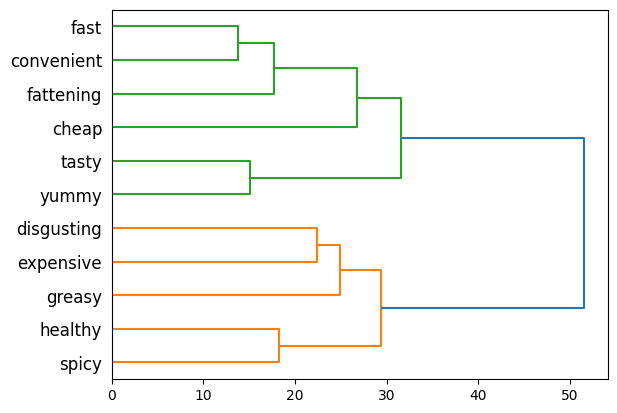

<Figure size 1400x800 with 0 Axes>

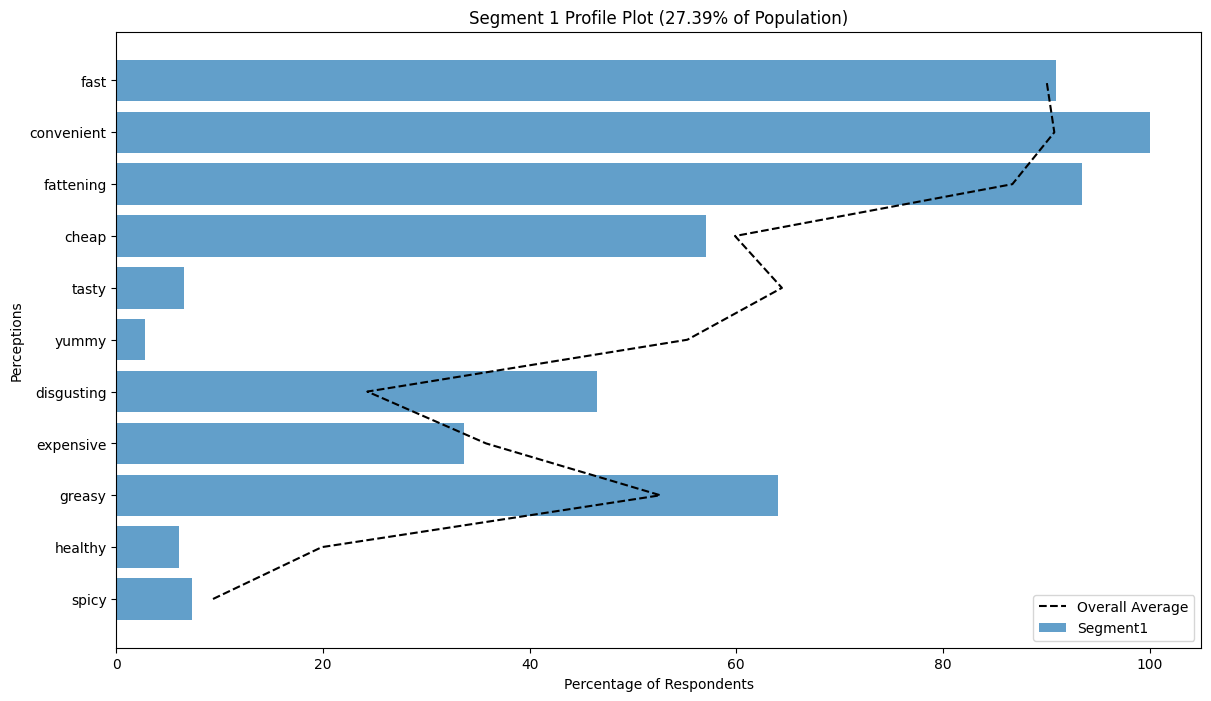

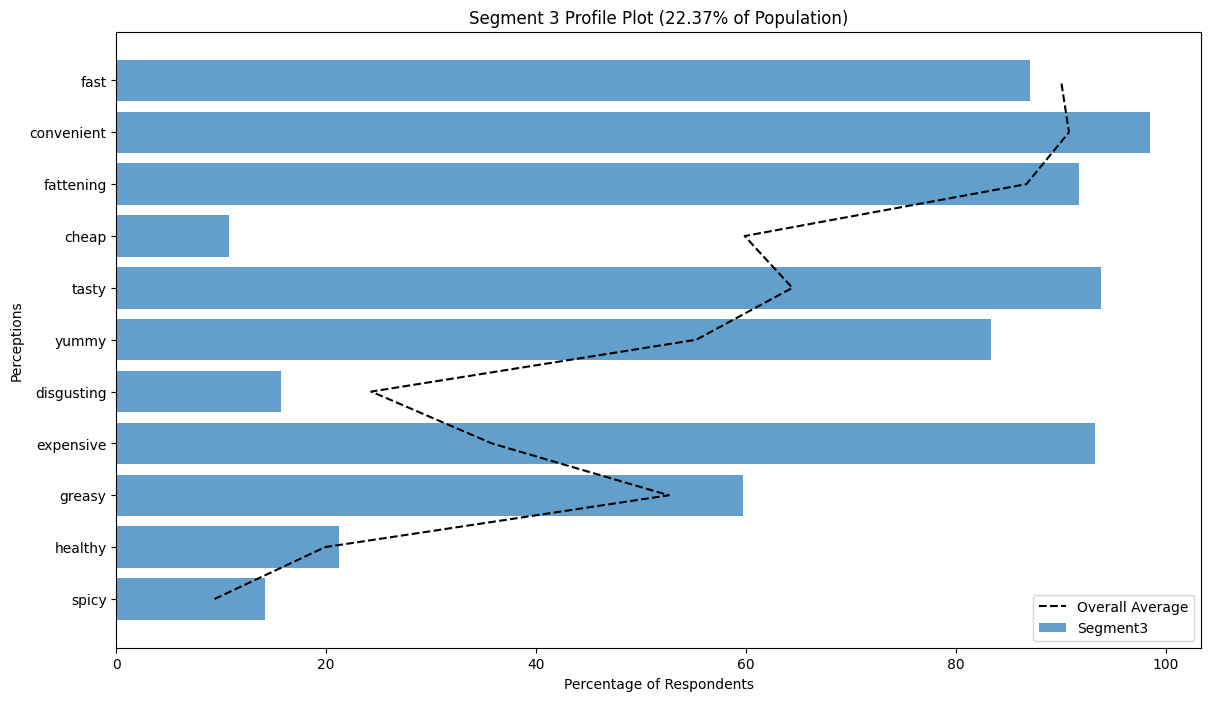

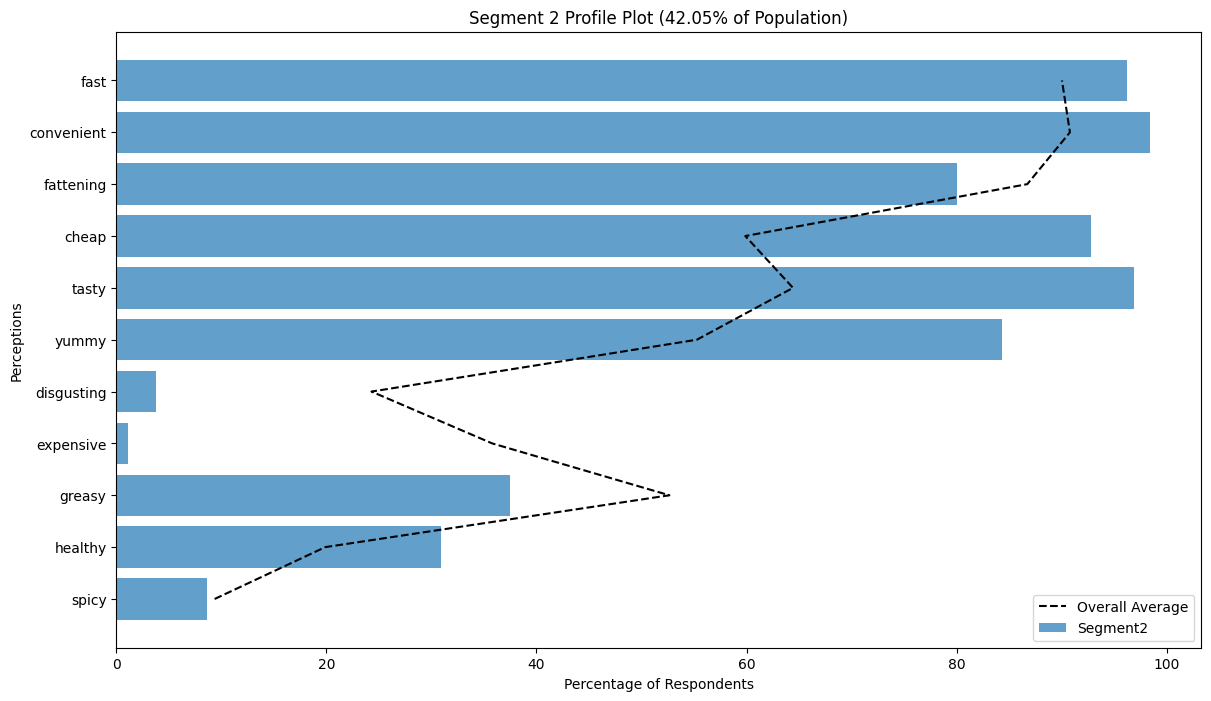

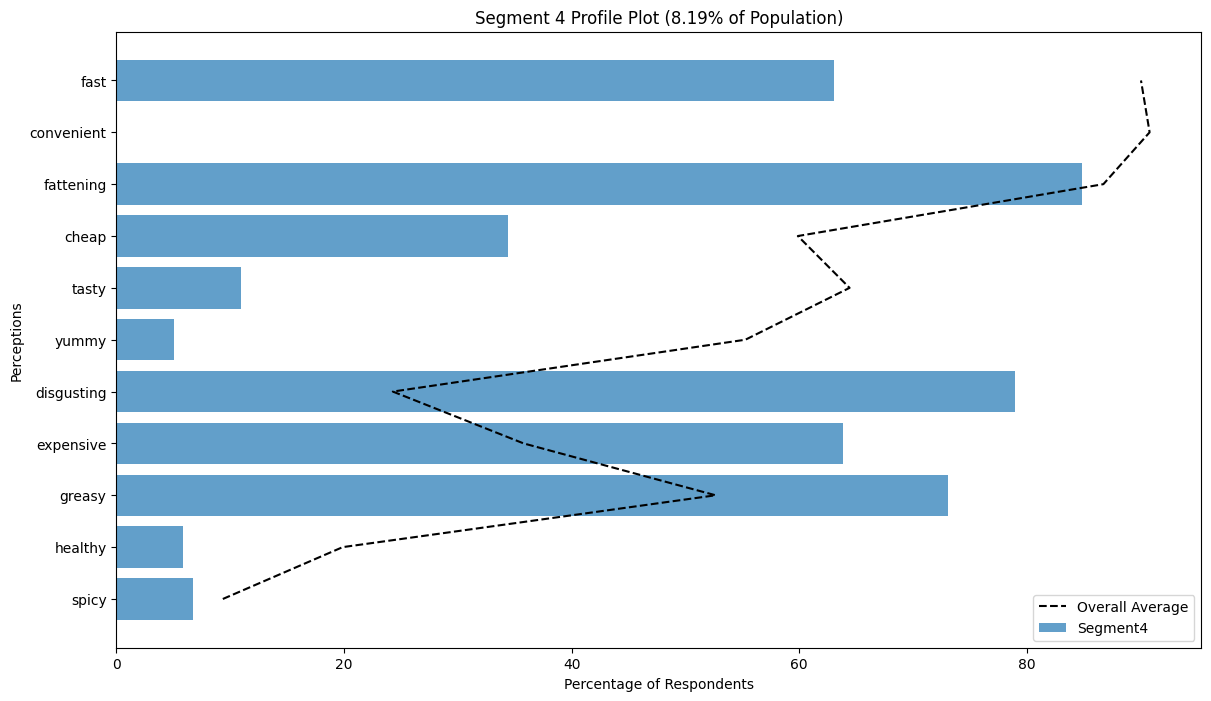

In [33]:
df = pd.read_csv('/content/mcdonalds.csv')
like_mapping = {
    'I love it!+5': 1, '+4': 2, '+3': 3, '+2': 4, '+1': 5,
    '0': 6, '-1': 7, '-2': 8, '-3': 9, '-4': 10, 'I hate it!-5': 11
}
df['Like_n']=df['Like'].map(like_mapping)
df['Like_n']=6-df['Like_n']
X=df[['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']]
X_2=df[['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']]

X_encoded=X.applymap(lambda x:1 if x=='Yes' else 0)
X_encoded_2=X_2.applymap(lambda x: 1 if x=='Yes' else 0)
# print(X_encoded)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_encoded)
kmeans=KMeans(n_clusters=4, random_state=1234, n_init=10)
X_encoded_2['Segment']=kmeans.fit_predict(X_scaled)
dist_matrix=linkage(X_encoded.T,method='ward')
dendro=dendrogram(dist_matrix,labels=X_encoded.columns,orientation='right')
ordered_attributes=dendro['ivl']
plt.figure(figsize=(14, 8))

for segment in X_encoded_2['Segment'].unique():
    segment_data=X_encoded_2[X_encoded_2['Segment']==segment]
    segment_percents=segment_data[ordered_attributes].mean()*100
    population_percentage=len(segment_data)/len(df)*100
    plt.figure(figsize=(14,8))
    plt.barh(ordered_attributes,segment_percents,alpha=0.7,label=f'Segment{segment+1}')
    overall_percents=X_encoded_2[ordered_attributes].mean()*100
    plt.plot(overall_percents,ordered_attributes,'k--',label='Overall Average')
    plt.xlabel('Percentage of Respondents')
    plt.ylabel('Perceptions')
    plt.title(f'Segment {segment+1} Profile Plot ({population_percentage:.2f}% of Population)')
    plt.legend()
    plt.show()


#Step 7: Describing Segments
The fast food data set is not typical for data collected for market segmentation analysis because it contains very few descriptor variables. Descriptor variables – additional pieces of information about consumers – are critically important to gaining a good understanding of market segments. One descriptor variable available in the fast food data set is the extent to which consumers love or hate McDonald’s. Using a simple mosaic plot, we can visualise the association between segment membership and loving or hating McDonald’s.

<Figure size 1200x800 with 0 Axes>

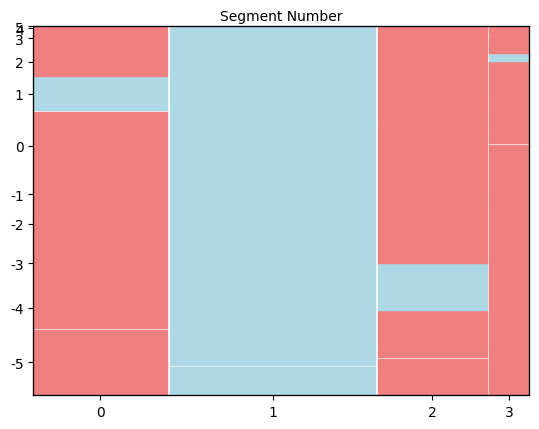

In [36]:
df = pd.read_csv('/content/mcdonalds.csv')
like_mapping = {
    'I love it!+5': 1, '+4': 2, '+3': 3, '+2': 4, '+1': 5,
    '0': 6, '-1': 7, '-2': 8, '-3': 9, '-4': 10, 'I hate it!-5': 11}
df['Like_n']=df['Like'].map(like_mapping)
df['Like_n']=6-df['Like_n']
X=df[['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']]
X_encoded=X.applymap(lambda x: 1 if x=='Yes' else 0)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_encoded)
kmeans=KMeans(n_clusters=4,random_state=1234, n_init=10)
df['Segment']=kmeans.fit_predict(X_scaled)
crosstab=pd.crosstab(df['Segment'], df['Like_n'])
plt.figure(figsize=(12, 8))
props=lambda key:{'color':'lightblue' if '1' in key else 'lightcoral'}
mosaic(crosstab.stack(), title='',labelizer=lambda k: '',properties=props,axes_label=True)
plt.xlabel('Segment Number')
plt.ylabel('Like/Hate McDonald\'s')
plt.show()

<Figure size 1200x800 with 0 Axes>

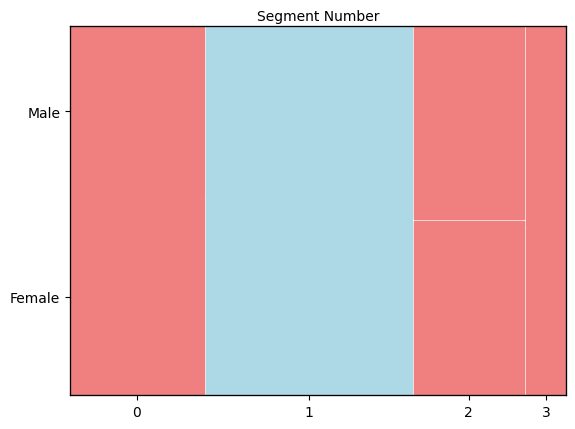

In [40]:
crosstab=pd.crosstab(df['Segment'],df['Gender'])
plt.figure(figsize=(12,8))
props=lambda key:{'color':'lightblue' if '1' in key else 'lightcoral'}
mosaic(crosstab.stack(),title='',labelizer=lambda k: '',properties=props,axes_label=True)
plt.xlabel('Segment Number')
plt.ylabel('Like/Hate McDonald\'s')
plt.show()

<ipython-input-41-3310edd56844>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment',y='Age',data=df,notch=True,width=0.5,showfliers=False,palette='pastel')


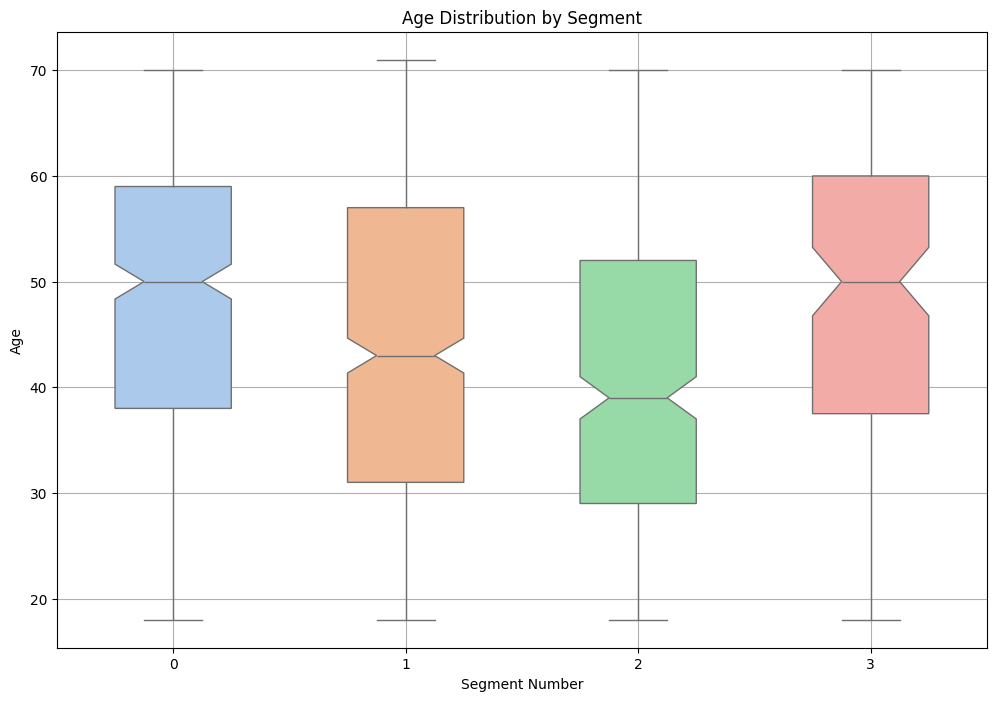

In [41]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Segment',y='Age',data=df,notch=True,width=0.5,showfliers=False,palette='pastel')
plt.xlabel('Segment Number')
plt.ylabel('Age')
plt.title('Age Distribution by Segment')
plt.grid(True)
plt.show()

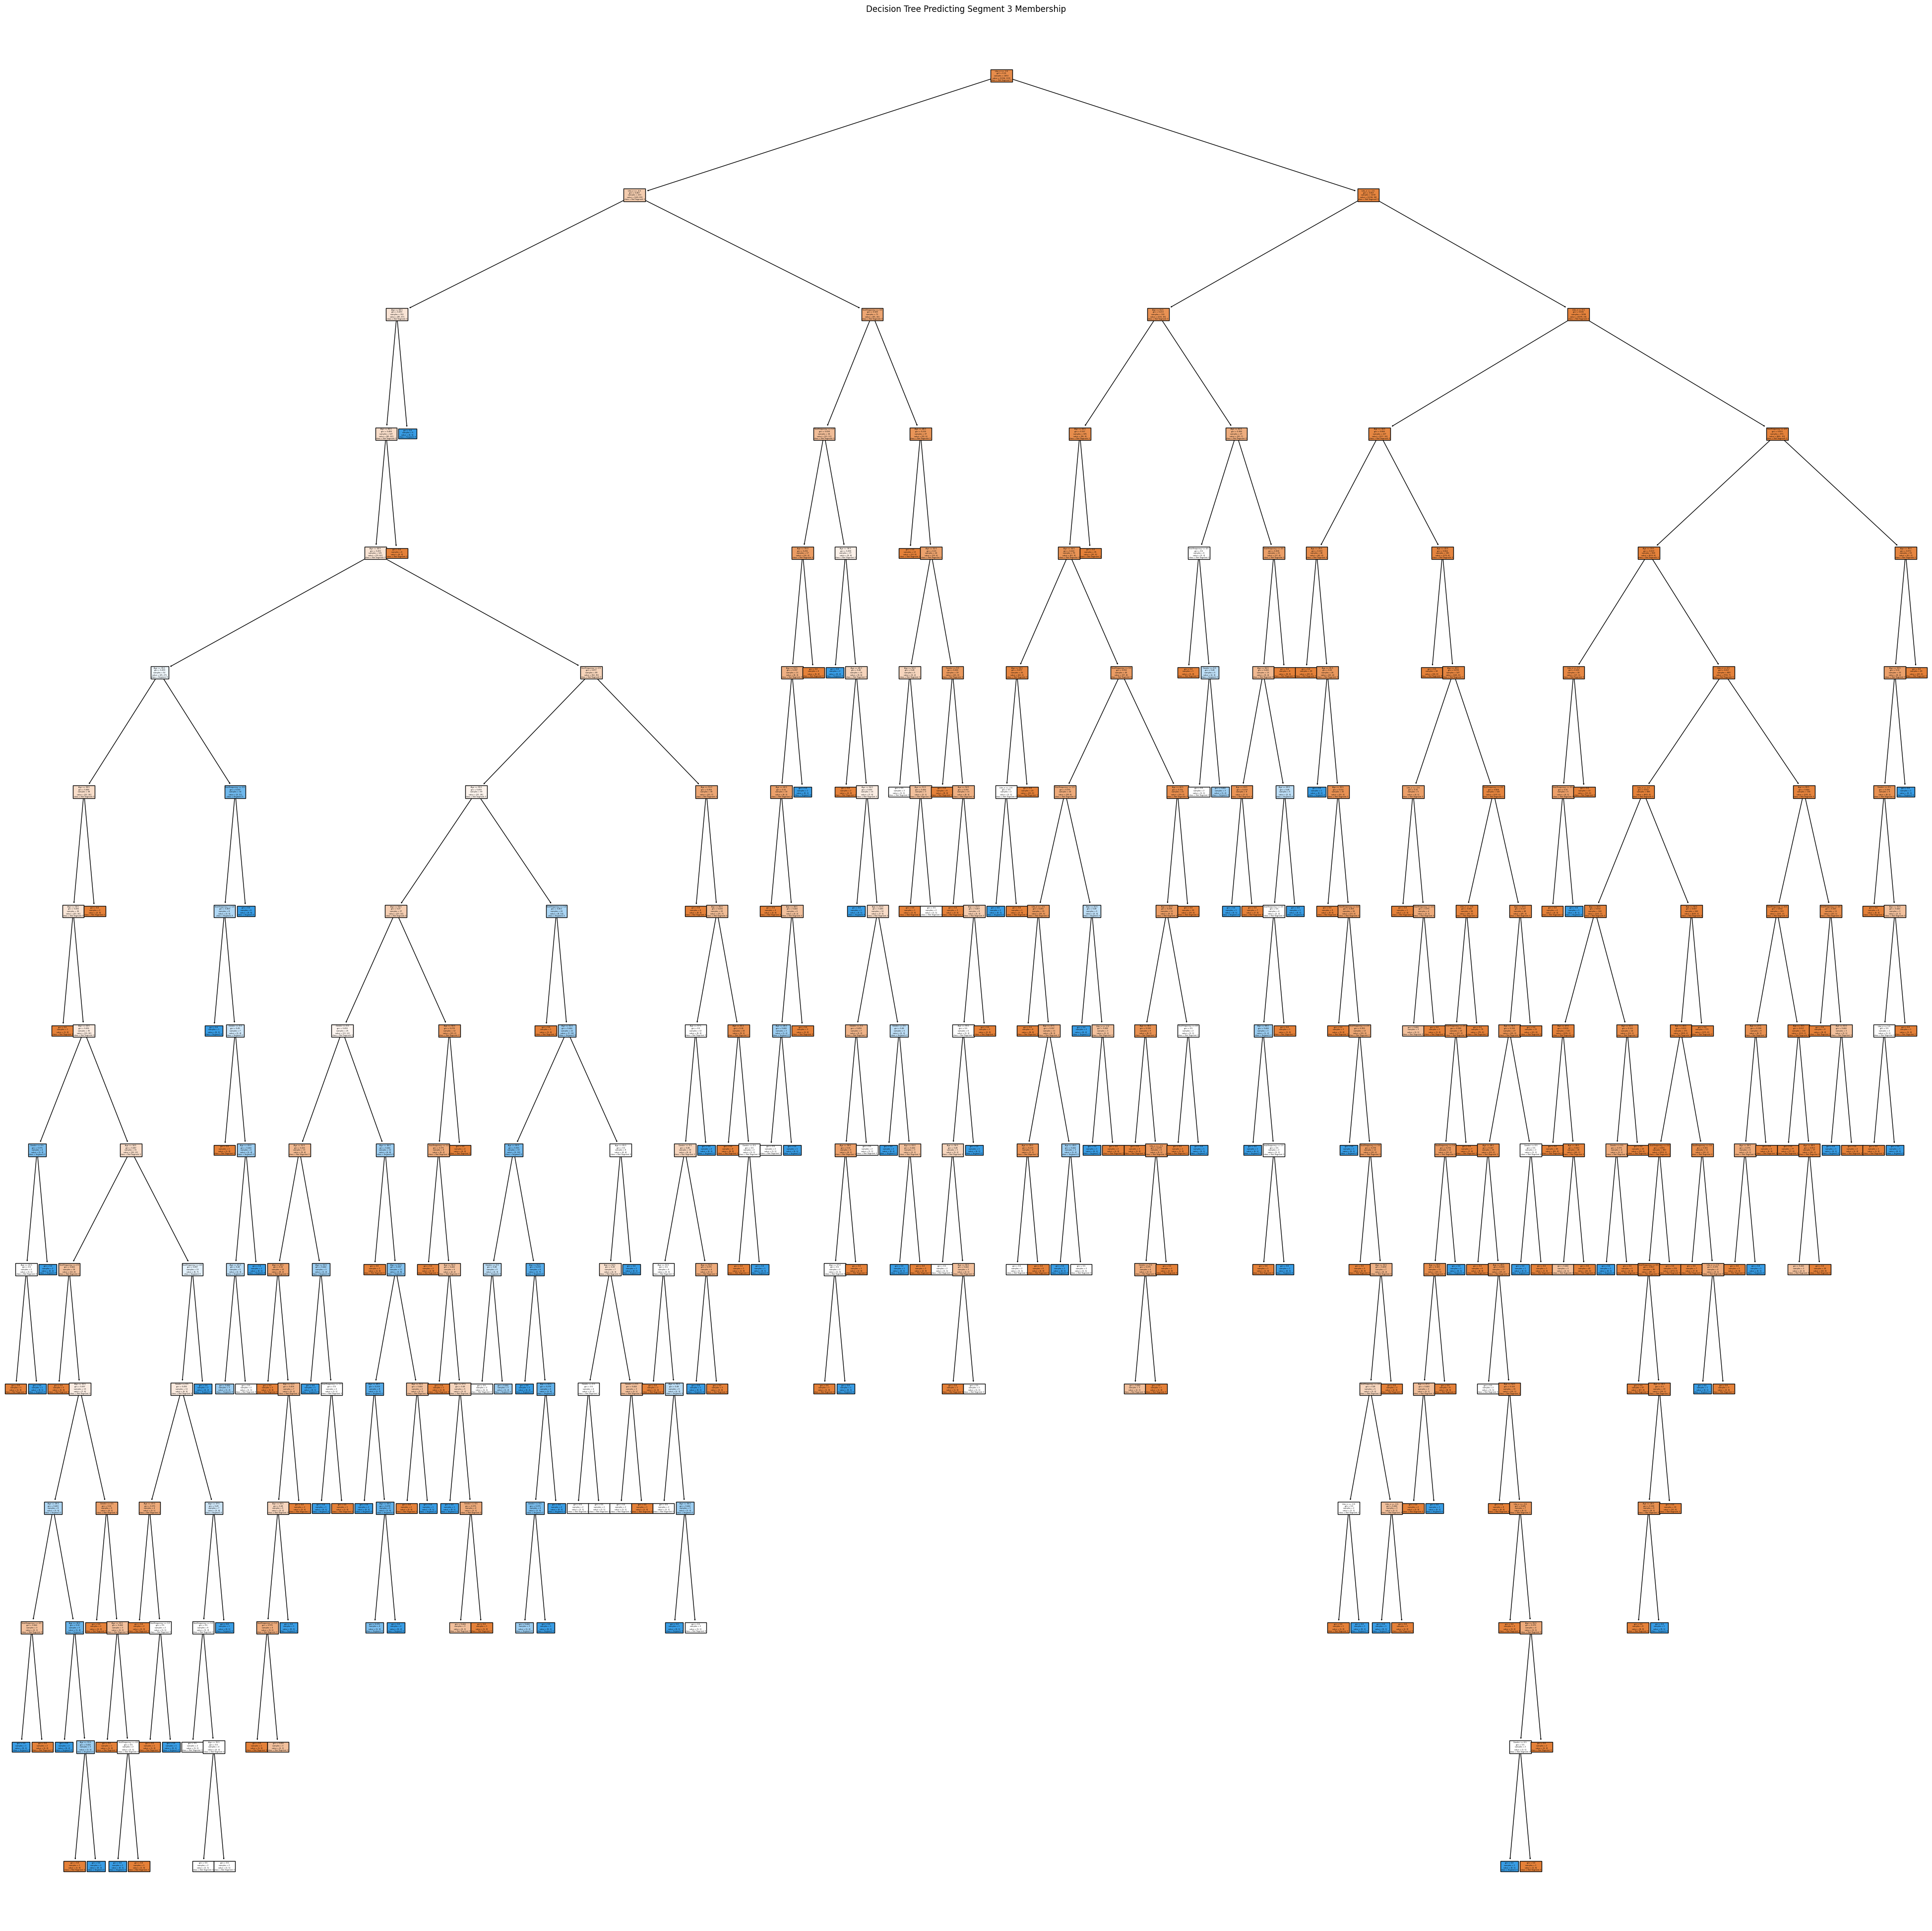

In [43]:
label_encoder=LabelEncoder()
df['Gender_encoded']=label_encoder.fit_transform(df['Gender'])
df['VisitFrequency_encoded']=label_encoder.fit_transform(df['VisitFrequency'])
df['Segment_3']=(df['Segment']==3).astype(int)
X=df[['Like_n','Age','VisitFrequency_encoded','Gender_encoded']]
y=df['Segment_3']
tree_model=DecisionTreeClassifier(random_state=1234)
tree_model.fit(X,y)

plt.figure(figsize=(50,50))
plot_tree(tree_model,feature_names=['Like_n','Age','VisitFrequency','Gender'],
          class_names=['Not Segment 3','Segment 3'],filled=True)
plt.title('Decision Tree Predicting Segment 3 Membership')
plt.show()

Figure A.14 shows the resulting classification tree. The independent variables used in the tree are LIKE.N, AGE and VISITFREQUENCY. GENDER is not used to split the respondents into groups. The tree indicates that respondents who like McDonald’s, and are young (node 10), or do not like McDonald’s, but visit it more often than once a month (node 8), have the highest probability to belong to segment 3. In contrast, respondents who give a score of −4 or worse for liking McDonald’s, and visit McDonald’s once a month at most (node 5), are almost certainly not members of segment 3.


#Step 8: Selecting (the) Target Segment(s)
Using the knock-out criteria and segment attractiveness criteria specified in Step 2, users of the market segmentation (McDonald’s managers) can now proceed to develop a segment evaluation plot.
The segment evaluation plot in Fig. A.15 is extremely simplified because only a small number of descriptor variables are available for the fast food data set. In Fig.A.15 the frequency of visiting McDonald’s is plotted along the x-axis. The extent of liking or hating McDonald’s is plotted along the y-axis. The bubble size represents the percentage of female consumers.
We can obtain the values required to construct the segment evaluation plot using the following commands. First, we compute the mean value of the visiting frequency of McDonald’s for each segment.

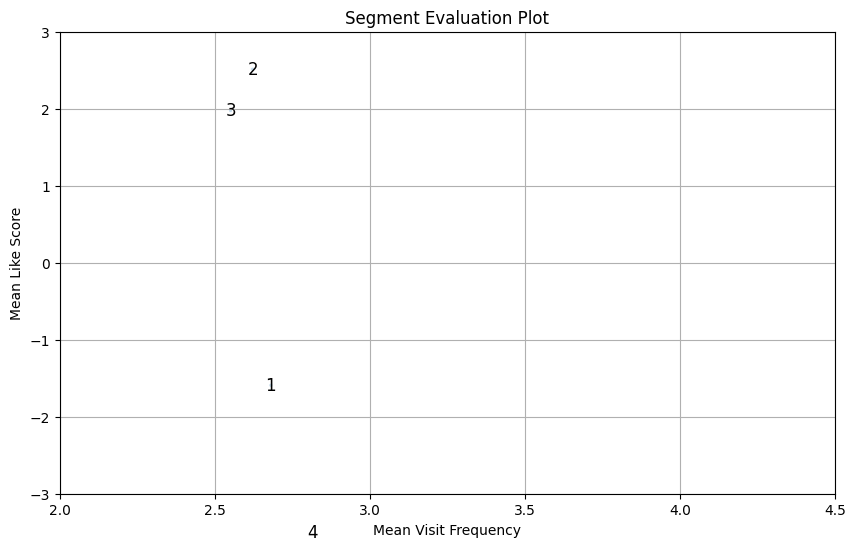

In [44]:
label_encoder=LabelEncoder()
df['Gender_encoded']=label_encoder.fit_transform(df['Gender'])
df['VisitFrequency_encoded']=label_encoder.fit_transform(df['VisitFrequency'])
kmeans=KMeans(n_clusters=4,random_state=1234,n_init=10)
df['Segment']=kmeans.fit_predict(X_scaled)

visit_mean=df.groupby('Segment')['VisitFrequency_encoded'].mean()
like_mean=df.groupby('Segment')['Like_n'].mean()
female_mean=df.groupby('Segment')['Gender'].apply(lambda x:(x=='Female').mean())
plt.figure(figsize=(10,6))
bubble_size=10*female_mean  #Scaling factor for bubble sizes

plt.scatter(visit_mean,like_mean,s=bubble_size,alpha=0.5,edgecolors="w",linewidth=2)

for i in range(len(visit_mean)):
    plt.text(visit_mean.iloc[i],like_mean.iloc[i],str(i + 1),fontsize=12,ha='center',va='center')
plt.xlim(2,4.5)
plt.ylim(-3,3)
plt.xlabel('Mean Visit Frequency')
plt.ylabel('Mean Like Score')
plt.title('Segment Evaluation Plot')
plt.grid(True)
plt.show()

#Step 9: Customising the Marketing Mix
In Step 9 the marketing mix is designed. If, for example, McDonald’s managers decide to focus on segment 3 (young customers who like McDonald’s, think the food is yummy and tasty, but perceive it as pretty expensive), they could choose to offer a MCSUPERBUDGET line to cater specifically to the price expectations of this segment (4Ps: Price). The advantage of such an approach might be that members of segment 3 develop to become loyal customers who, as they start earning more money, will not care about the price any more and move to the regular McDonald’s range of products. To not cannibalise the main range, the product features of the MCSUPERBUDGET range would have to be distinctly different (4Ps: Product). Next, communication channels would have to be identified which are heavily used by members of segment 3 to communicate the availability of the MCSUPERBUDGET line (4Ps: Promotion). Distribution channels (4Ps: Place) would have to be the same given that all McDonald’s food is sold in McDonald’s outlets. But McDonald’s management could consider having a MCSUPERBUDGET lane where the wait in the queue might be slightly longer in an attempt not to cannibalise the main product line.

#Step 10: Evaluation and Monitoring
After the market segmentation analysis is completed, and all strategic and tactical marketing activities have been undertaken, the success of the market segmentation strategy has to be evaluated, and the market must be carefully monitored on a continuous basis. It is possible, for example, that members of segment 3 start earning more money and the MCSUPERBUDGET line is no longer suitable for them. Changes can occur within existing market segments. But changes can also occur in the larger marketplace, for example, if new competitors enter the market. All potential sources of change have to be monitored in order to detect changes which require McDonald’s management to adjust their strategic or tactical marketing in view of new market circumstances.